In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [4]:
# Load dataset
df = pd.read_csv("C:/Users/ASUS/Downloads/laptop_prices.csv")
df

,Unnamed: 0.1,Unnamed: 0,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,0,0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1
1,1,1,HP,15s-fq5007TU Laptop,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
2,2,2,Acer,One 14 Z8-415 Laptop,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1
3,3,3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16GB,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,14.0,2240.0,1400.0,Windows 11 OS,1
4,4,4,Apple,MacBook Air 2020 MGND3HN Laptop,69990,69.323529,Apple M1,Octa Core (4P + 4E),8GB,DDR4,256GB,SSD,Apple M1 Integrated Graphics,13.3,2560.0,1600.0,Mac OS,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,926,1015,Asus,Vivobook 15X 2023 K3504VAB-NJ321WS Laptop,44990,69.323529,13th Gen ‎Intel Core i3 1315U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Integrated Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
889,927,1016,Asus,TUF A15 FA577RM-HQ032WS Laptop,110000,71.000000,6th Gen AMD Ryzen 7 6800H,"Octa Core, 16 Threads",16GB,DDR,1TB,SSD,6GB NVIDIA GeForce RTX 3060,15.6,2560.0,1440.0,Windows 11 OS,1
890,928,1017,Asus,ROG Zephyrus G14 2023 GA402XV-N2034WS Gaming L...,189990,89.000000,7th Gen AMD Ryzen 9 7940HS,"Octa Core, 16 Threads",32GB,DDR5,1TB,SSD,8GB NVIDIA GeForce RTX 4060,14.0,2560.0,1600.0,Windows 11 OS,1
891,929,1018,Asus,TUF Gaming F15 2023 FX507VU-LP083WS Gaming Laptop,129990,73.000000,13th Gen Intel Core i7 13700H,"14 Cores (6P + 8E), 20 Threads",16GB,DDR4,512GB,SSD,6GB NVIDIA GeForce RTX 4050,15.6,1920.0,1080.0,Windows 11 OS,1


In [5]:
# Find missing values
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 Unnamed: 0.1         0
Unnamed: 0           0
brand                0
name                 0
price                0
spec_rating          0
processor            0
CPU                  0
Ram                  0
Ram_type             0
ROM                  0
ROM_type             0
GPU                  0
display_size         0
resolution_width     0
resolution_height    0
OS                   0
warranty             0
dtype: int64


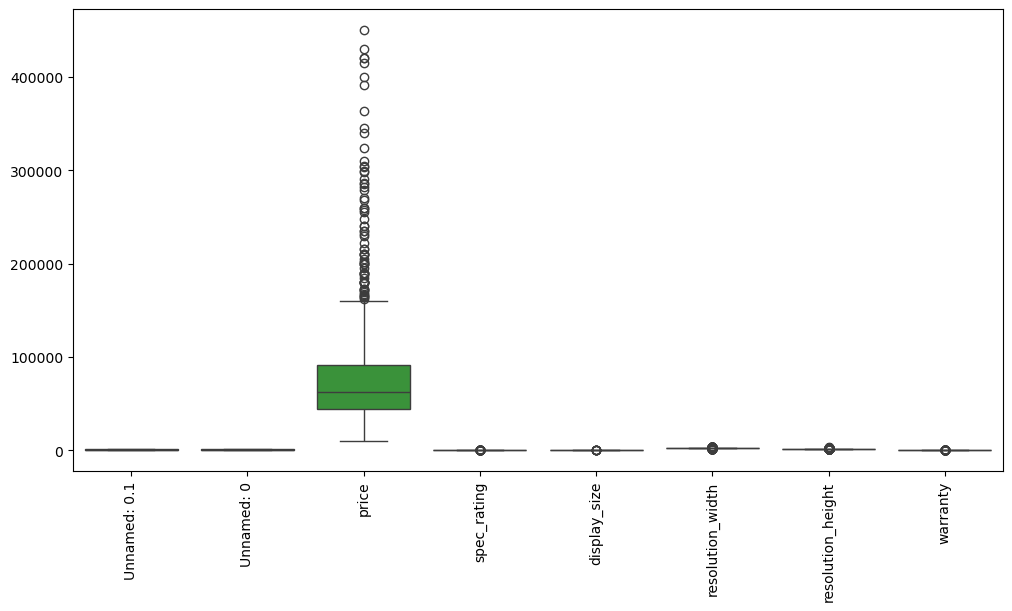

In [6]:
# Check for outliers using boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.xticks(rotation=90)
plt.show()

In [7]:
# Drop outliers (values beyond 1.5*IQR)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [8]:
# Applying outlier removal for numerical columns
for col in df.select_dtypes(include=[np.number]).columns:
    df = remove_outliers(df, col)

In [9]:
# Perform label encoding on categorical columns
label_encoders = {}
categorical_columns = df.select_dtypes(include=["object"]).columns
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [28]:
df

,Unnamed: 0.1,Unnamed: 0,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,0,0,6,371,49900,73.000000,75,12,4,1,3,1,7,15.6,1920.0,1080.0,5,1
1,1,1,6,31,39900,60.000000,26,11,4,1,3,1,72,15.6,1920.0,1080.0,5,1
2,2,2,1,250,26990,69.323529,11,10,4,1,3,1,69,14.0,1920.0,1080.0,5,1
5,5,5,1,97,39990,62.000000,30,3,4,1,3,1,69,14.0,1920.0,1080.0,5,1
6,6,6,5,188,36790,60.000000,26,11,4,1,3,1,72,15.6,1920.0,1080.0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,923,1012,5,101,125699,75.000000,51,4,1,3,3,1,27,15.6,1920.0,1080.0,5,1
886,924,1013,1,75,49990,69.323529,39,11,1,5,3,1,61,14.0,1920.0,1080.0,6,1
887,925,1014,1,62,56990,69.323529,40,0,1,7,3,1,60,15.6,1920.0,1080.0,5,1
888,926,1015,2,417,44990,69.323529,54,11,4,1,3,1,47,15.6,1920.0,1080.0,5,1


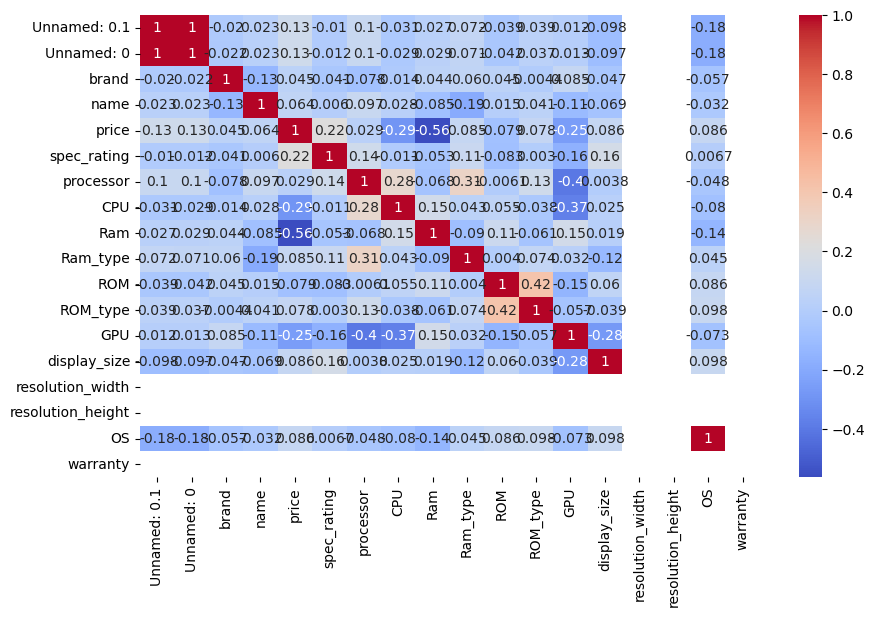

In [10]:
# Check correlation
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

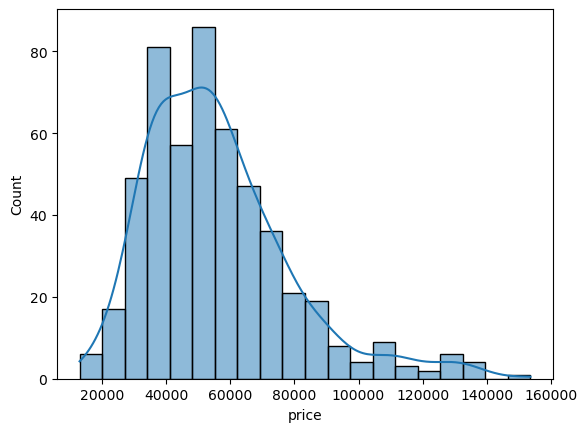

In [12]:
# Check outcome proportionality
sns.histplot(df['price'], bins=20, kde=True)
plt.show()

In [ ]:
# PIE CHART

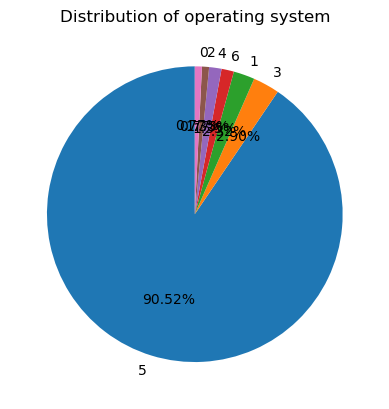

In [16]:
os_counts = df["OS"].value_counts()
plt.pie(os_counts, labels=os_counts.index, autopct='%0.2f%%', startangle=90)
plt.title("Distribution of operating system")
plt.show()

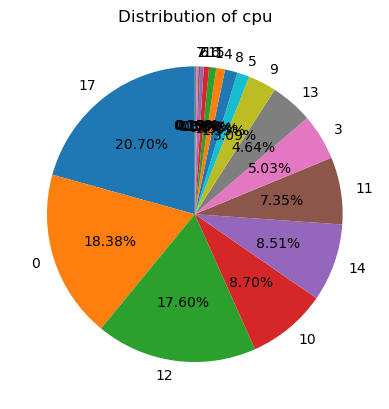

In [21]:
processor_counts = df["CPU"].value_counts()
plt.pie(processor_counts, labels=processor_counts.index, autopct='%0.2f%%', startangle=90)
plt.title("Distribution of cpu")
plt.show()

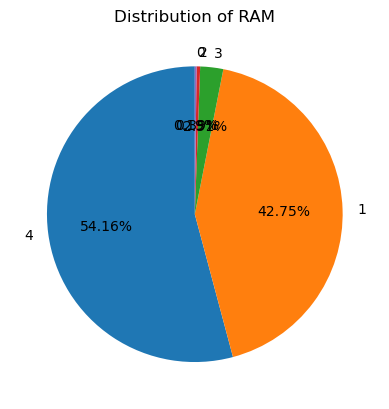

In [22]:
processor_counts = df["Ram"].value_counts()
plt.pie(processor_counts, labels=processor_counts.index, autopct='%0.2f%%', startangle=90)
plt.title("Distribution of RAM")
plt.show()

In [ ]:
# LINE CHART

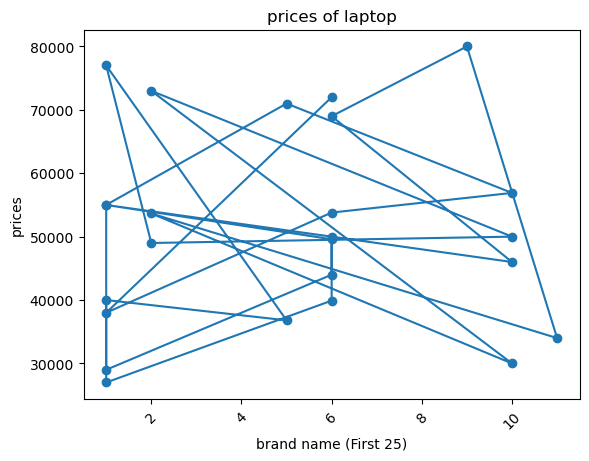

In [25]:
plt.plot(df["brand"][:25], df["price"][:25], marker='o', linestyle='-')
plt.xlabel("brand name (First 25)")
plt.ylabel("prices")
plt.title("prices of laptop")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# SCATTER PLOT

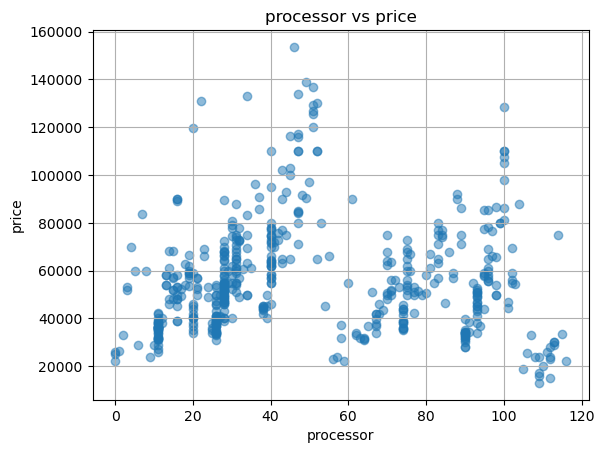

In [31]:
plt.scatter(df["processor"], df["price"], alpha=0.5)
plt.xlabel("processor")
plt.ylabel("price")
plt.title("processor vs price")
plt.grid(True)
plt.show()

In [ ]:
# POLYNOMIAL REGRESSION ALGORITHM

In [44]:
X=df["processor"].to_frame()
Y=df['price'] 

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,
random_state=42)

In [51]:
model=LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [46]:
poly=PolynomialFeatures(degree=2)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [47]:
model_poly=LinearRegression()
model_poly.fit(X_train_poly, Y_train)

LinearRegression()

In [48]:
Y_pred_poly=model_poly.predict(X_test_poly)

In [49]:
Y_pred_poly

array([45375.82859773, 60524.37924719, 55914.54943394, 56938.83415286,
       59489.91558339, 63738.84945895, 56559.60787115, 66377.69428491,
       66636.99768891, 49721.80457243, 56938.83415286, 50046.11919917,
       45375.82859773, 59809.88775859, 52093.40257822, 34533.45746506,
       58146.25248991, 58720.46321105, 63738.84945895, 40940.67456294,
       56559.60787115, 58146.25248991, 45375.82859773, 56559.60787115,
       50046.11919917, 45375.82859773, 57185.00067677, 52394.27277411,
       41939.7143687 , 39921.96912559, 45375.82859773, 63738.84945895,
       63155.79508049, 56559.60787115, 44818.83999647, 56938.83415286,
       60524.37924719, 60524.37924719, 49721.80457243, 65968.2376091 ,
       65693.4331904 , 58146.25248991, 59809.88775859, 49224.07007769,
       47520.97493996, 61296.53234299, 56938.83415286, 56938.83415286,
       37399.65419572, 52394.27277411, 62357.31899574, 34084.10587379,
       64206.01697073, 45375.82859773, 63738.84945895, 58146.25248991,
      

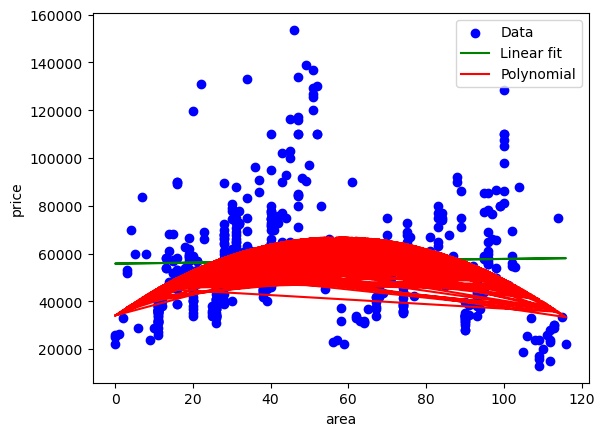

In [52]:
plt.scatter(X,Y,color='blue',label='Data')
plt.plot(X,model.predict(X), color='green', label='Linear fit')
plt.plot(X,model_poly.predict(poly.transform(X)), color='red' , label='Polynomial')
plt.xlabel('area')
plt.ylabel('price')
plt.legend()
plt.show()